Unsupervised learning - Clustering

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score
from collections import Counter
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)
X = pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
y = df['label']
n_y = len(y.unique()) #number of different labels

KMeans

Best number of clusters: 13 with corresponding silhouette score: 0.5424126718933323


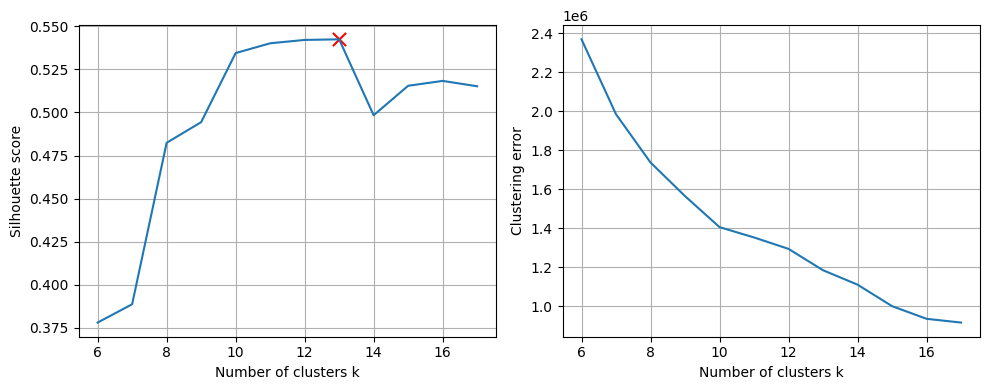

In [48]:
kmeans_labels = []
sh_scores = []
cl_scores = []

for k in range (int(0.5*n_y), int(1.5*n_y)):
    results = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42).fit(X)
    kmeans_labels.append(results.labels_)
    sh_scores.append(silhouette_score(X, results.labels_))
    cl_scores.append(results.inertia_)

n_clusters = [n for n in range(int(0.5*n_y), int(1.5*n_y))]
best_sh = np.max(sh_scores)
best_n = n_clusters[np.argmax(sh_scores)]
print(f'Best number of clusters: {best_n} with corresponding silhouette score: {best_sh}')

fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(n_clusters, sh_scores)
axs[0].scatter(best_n, best_sh, color='r', marker='x', s=90)
axs[0].set_xlabel("Number of clusters k")
axs[0].set_ylabel("Silhouette score")
axs[0].grid()

axs[1].plot(n_clusters, cl_scores)
axs[1].set_xlabel("Number of clusters k")
axs[1].set_ylabel("Clustering error")
axs[1].grid()

plt.tight_layout()
plt.show()

In [25]:
kmeans = KMeans(n_clusters=13, init='k-means++', n_init='auto', random_state=42)
result = kmeans.fit(X)
labels = result.labels_
print(f'Silhouette score for KMeans cluster algorithm is {silhouette_score(X, labels)}')
print(f'Clustering error: {result.inertia_}')

Silhouette score for KMeans cluster algorithm is 0.5424126718933323
Clustering error: 1183811.8713118306


Hyperparameter tuning

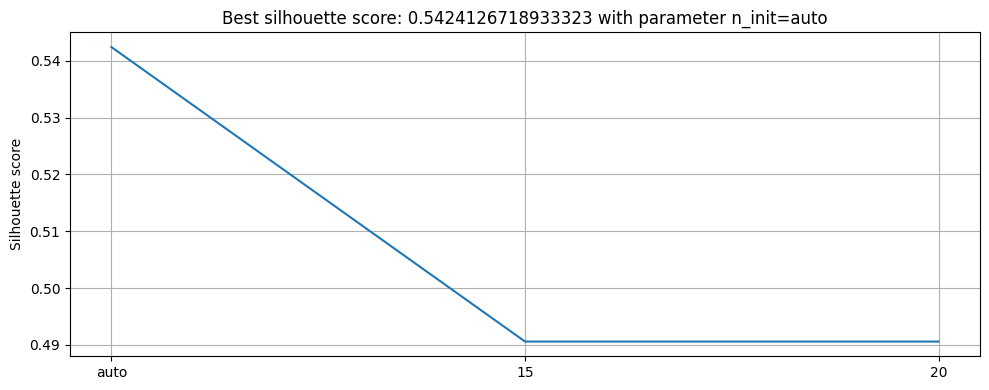

In [50]:
n_init = ['auto', 15, 20]
sh_scores = []

for n in n_init:
    results = KMeans(n_clusters=13, init='k-means++', random_state=42, n_init=n).fit(X)
    labels = results.labels_
    sh_scores.append((silhouette_score(X, labels)))


plt.figure(figsize=(10, 4))

plt.plot(n_init, sh_scores)
plt.title(f'Best silhouette score: {np.max(sh_scores)} with parameter n_init={n_init[np.argmax(sh_scores)]}')
plt.ylabel('Silhouette score')
plt.grid()

plt.tight_layout()
plt.show()

Number of cluster selection: we evaluate the proper number of clusters on the silhouette score in a validation computing the silhouette score for differents number cluster of parameters for each clustering algorithm chosen

Gaussian Mixture

Best number of clusters: 17 with corresponding silhouette score: 0.39576278288596006


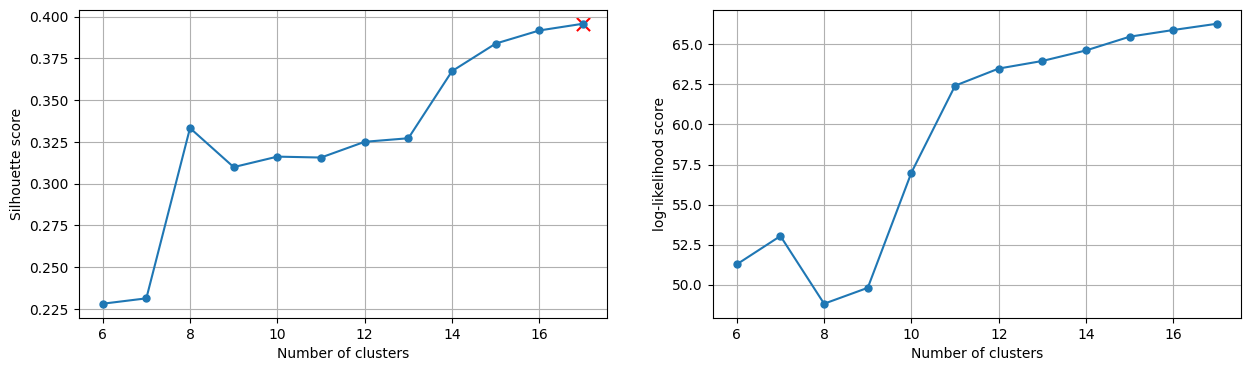

In [43]:
n_cluster = []
sh_scores = []
log_score = []
for n in range(int(n_y / 2), int(1.5 * n_y)):
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X)
    labels = gmm.predict(X)
    n_cluster.append(n)
    sh_scores.append(silhouette_score(X, labels))
    log_score.append(gmm.score(X))

best_sh = np.max(sh_scores)
best_n = n_cluster[np.argmax(sh_scores)]
print(f'Best number of clusters: {best_n} with corresponding silhouette score: {best_sh}')

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].plot(n_cluster, sh_scores, marker='o', markersize=5)
ax[0].scatter(best_n, best_sh, color='r', marker='x', s=90)
ax[0].grid()
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Silhouette score') 

ax[1].plot(n_cluster, log_score, marker='o', markersize=5)
ax[1].grid()
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('log-likelihood score') 
plt.show()

In [6]:
pca_result =pd.read_csv('pca_dataframe.csv').to_numpy()
gmm = GaussianMixture(n_components=17)
labels = gmm.fit_predict(X)
print(f'Silhouette score for GMM cluster algorithm is {silhouette_score(X, labels)}')


Hyperparameter tuning

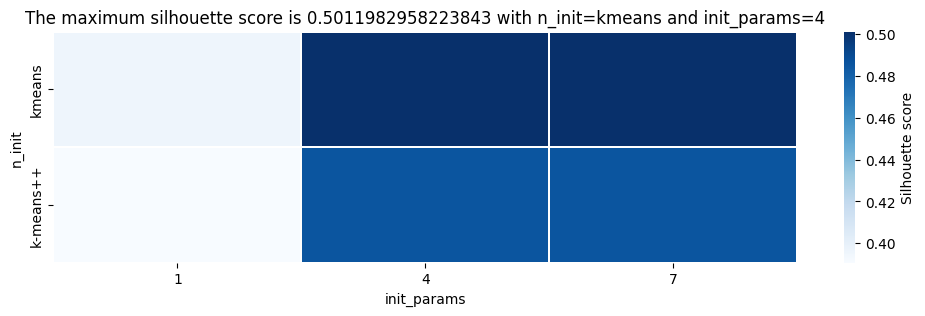

In [59]:
n_init = [1, 4, 7]
init_params = ['kmeans', 'k-means++']

sh_scores = []

for n in n_init:
    for param in init_params:
        results = GaussianMixture(n_components=17, init_params=param, random_state=42, n_init=n).fit(X)
        labels = results.predict(X)
        sh_scores.append((param, n, (silhouette_score(X, labels))))

gs = pd.DataFrame(sh_scores, columns=['n_init', 'init_params', 'sh'])
gs = pd.pivot_table(gs, columns='init_params', index='n_init', values='sh', aggfunc=lambda x:x)

plt.figure(figsize=(12,3))
max_ss = gs.max().max()
n_init_max_ss = gs.stack().idxmax()[0]
init_params_max_ss = gs.stack().idxmax()[1]
plt.title(f'The maximum silhouette score is {max_ss} with n_init={n_init_max_ss} and init_params={init_params_max_ss}')
sns.heatmap(gs, cmap='Blues', cbar_kws={'label':'Silhouette score'}, linewidths=.005)
plt.gca().invert_yaxis()
plt.show()


DBSCAN

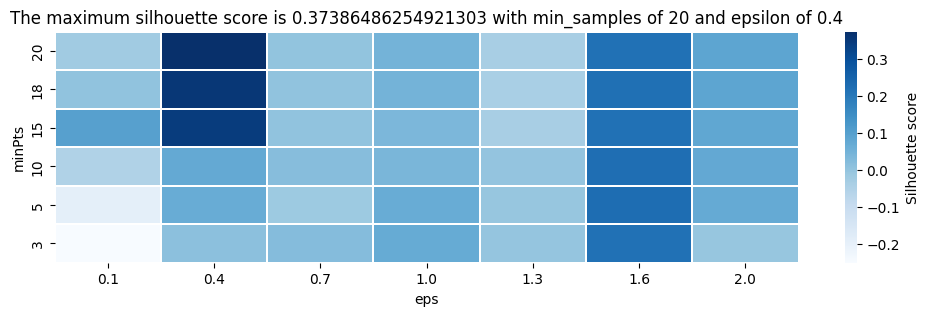

In [15]:
sh_scores =[]
mins = [3, 5, 10, 15, 18, 20]
epsilon = [0.1, 0.4, 0.7, 1, 1.3, 1.6, 2]

labels = []
for eps in epsilon:
    for min in mins:
        dbscan = DBSCAN(eps=eps, min_samples=min)
        labels = dbscan.fit_predict(X)
        sh_scores.append((eps, min, silhouette_score(X, labels)))

gs = pd.DataFrame(sh_scores, columns=['eps', 'minPts', 'sh'])
gs = pd.pivot_table(gs, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

plt.figure(figsize=(12,3))
max_ss = gs.max().max()
mins_max_ss = gs.stack().idxmax()[0]
eps_max_ss = gs.stack().idxmax()[1]
plt.title(f'The maximum silhouette score is {max_ss} with min_samples of {mins_max_ss} and epsilon of {eps_max_ss}')
sns.heatmap(gs, cmap='Blues', cbar_kws={'label':'Silhouette score'}, linewidths=.005)
plt.gca().invert_yaxis()
plt.show()

In [4]:
labels_km = KMeans(n_clusters=13, init='k-means++', random_state=42, n_init='auto').fit_predict(X)
labels_gmm = GaussianMixture(n_components=17, random_state=42, n_init=4, init_params='kmeans').fit_predict(X)
labels_dbscan = DBSCAN(eps=0.4, min_samples=20).fit_predict(X) 

labels = [labels_km, labels_gmm, labels_dbscan]
algorithms = ['KMeans', 'GMM', 'DBSCAN']
for alg, label in zip(algorithms, labels):
    print(f'Silhouette score tuned {alg}: {silhouette_score(X, label)}')

Silhouette score tuned KMeans: 0.5424126718933323
Silhouette score tuned GMM: 0.5011982958223843
Silhouette score tuned DBSCAN: 0.3738648625492077


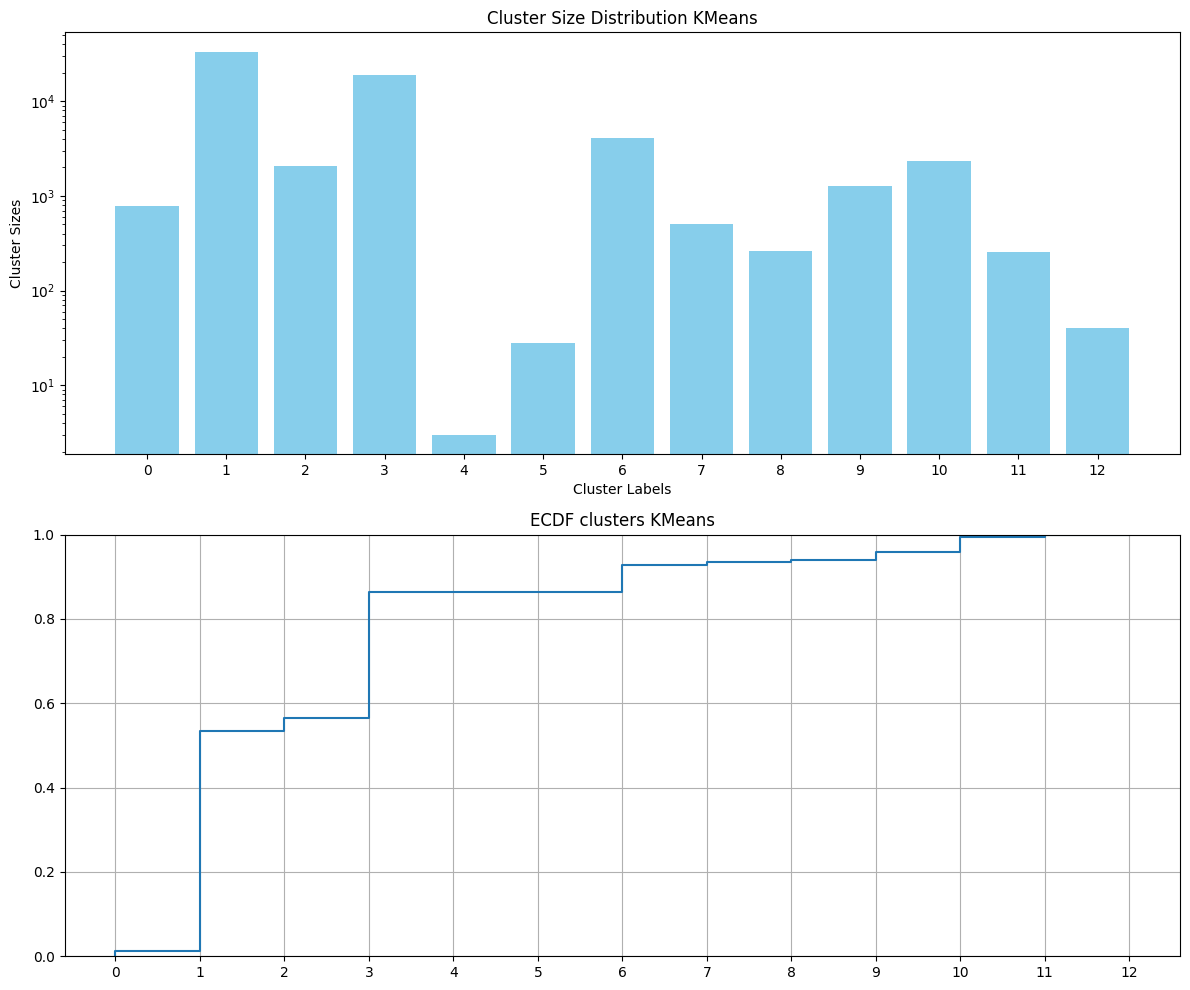

In [8]:
label_counts = Counter(labels_km)

# Extract cluster sizes and labels
cluster_sizes = list(label_counts.values())
cluster_labels = list(label_counts.keys())

fig, axs = plt.subplots(2, 1, figsize=(12,10))

axs[0].bar(cluster_labels, cluster_sizes, color='skyblue')
axs[0].set_xlabel('Cluster Labels')
axs[0].set_yscale('log')
axs[0].set_ylabel('Cluster Sizes')
axs[0].set_xticks(np.arange(13))
axs[0].set_title('Cluster Size Distribution KMeans')


axs[1].ecdf(cluster_labels, cluster_sizes)
axs[1].set_xticks(np.arange(13))
axs[1].set_title('ECDF clusters KMeans')
axs[1].grid()

plt.tight_layout()
plt.show()

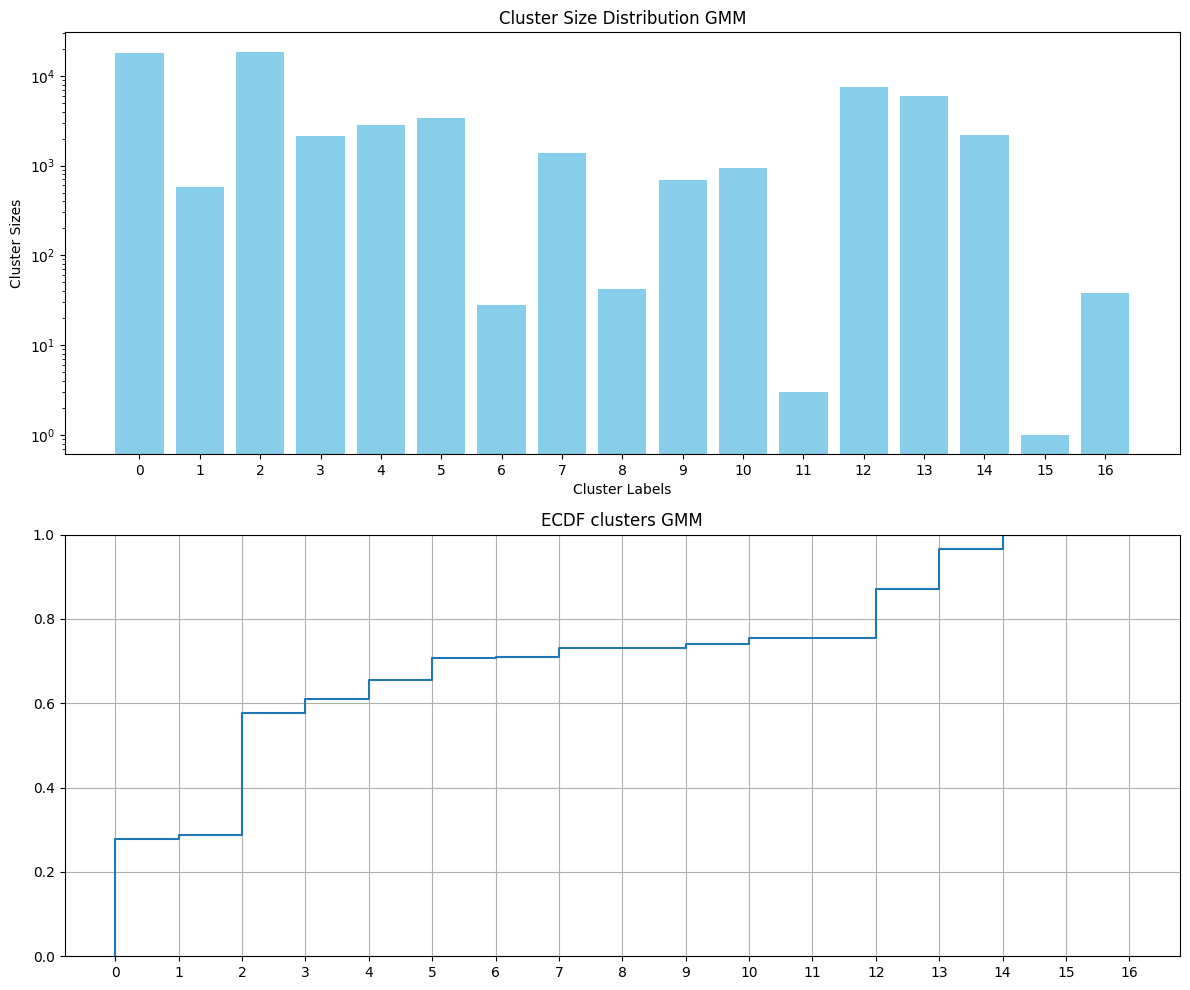

In [9]:
label_counts = Counter(labels_gmm)

# Extract cluster sizes and labels
cluster_sizes = list(label_counts.values())
cluster_labels = list(label_counts.keys())

fig, axs = plt.subplots(2, 1, figsize=(12,10))

axs[0].bar(cluster_labels, cluster_sizes, color='skyblue')
axs[0].set_xlabel('Cluster Labels')
axs[0].set_yscale('log')
axs[0].set_ylabel('Cluster Sizes')
axs[0].set_xticks(np.arange(17))
axs[0].set_title('Cluster Size Distribution GMM')


axs[1].ecdf(cluster_labels, cluster_sizes)
axs[1].set_xticks(np.arange(17))
axs[1].set_title('ECDF clusters GMM')
axs[1].grid()

plt.tight_layout()
plt.show()

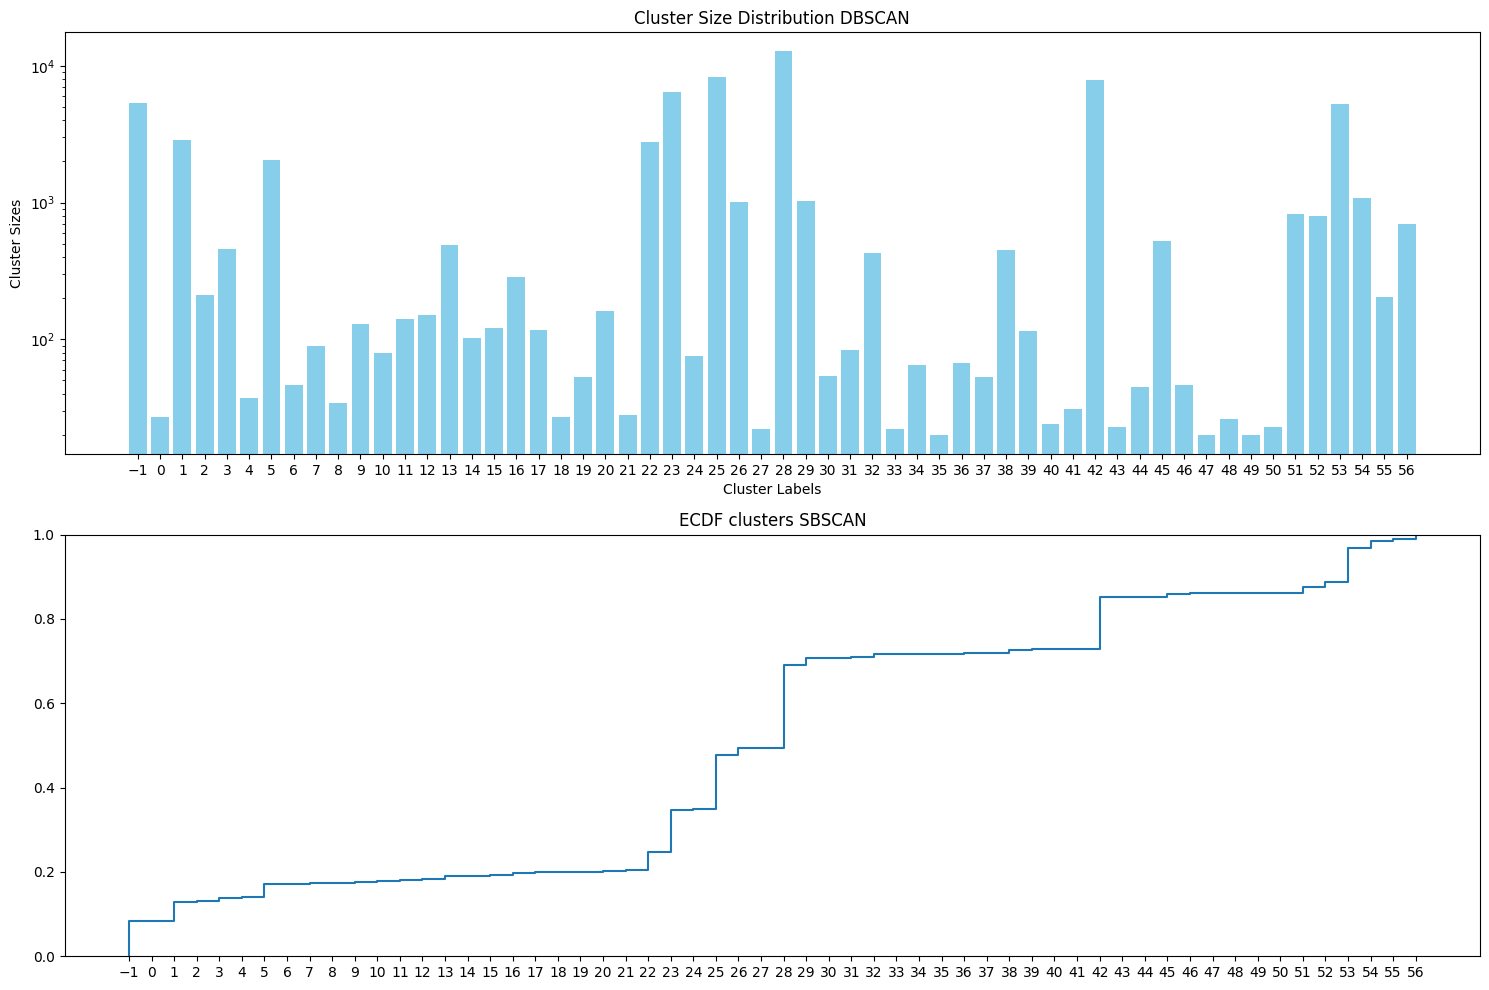

In [35]:
label_counts = Counter(labels_dbscan)

# Extract cluster sizes and labels
cluster_sizes = list(label_counts.values())
cluster_labels = list(label_counts.keys())

fig, axs = plt.subplots(2, 1, figsize=(15,10))

axs[0].bar(cluster_labels, cluster_sizes, color='skyblue')
axs[0].set_xlabel('Cluster Labels')
axs[0].set_yscale('log')
axs[0].set_ylabel('Cluster Sizes')
axs[0].set_xticks(np.arange(-1, 57))
axs[0].set_title('Cluster Size Distribution DBSCAN')

axs[1].ecdf(cluster_labels, cluster_sizes)
axs[1].set_title('ECDF clusters SBSCAN')
axs[1].set_xticks(np.arange(-1, 57))


plt.tight_layout()
plt.show()

In [7]:
cluster_df = pd.DataFrame({'label': y, 'cid_KM':labels_km, 'cid_gmm':labels_gmm, 'cid_dbscan':labels_dbscan})

In [8]:
print(f'RI score between KMeans and GMM: {rand_score(cluster_df['cid_KM'], cluster_df['cid_gmm'])}')
print(f'ARI score between KMeans and GMM: {adjusted_rand_score(cluster_df['cid_KM'], cluster_df['cid_gmm'])}')

print(f'RI score between KMeans and DBSCAN: {rand_score(cluster_df['cid_KM'], cluster_df['cid_dbscan'])}')
print(f'ARI score between KMeans and DBSCAN: {adjusted_rand_score(cluster_df['cid_KM'], cluster_df['cid_dbscan'])}')

print(f'RI score between GMM and DBSCAN: {rand_score(cluster_df['cid_gmm'], cluster_df['cid_dbscan'])}')
print(f'ARI score between GMM and DBSCAN: {adjusted_rand_score(cluster_df['cid_gmm'], cluster_df['cid_dbscan'])}')

RI score between KMeans and GMM: 0.8130923201496865
ARI score between KMeans and GMM: 0.5533377521931285
RI score between KMeans and DBSCAN: 0.7184146980549133
ARI score between KMeans and DBSCAN: 0.285871214630086
RI score between GMM and DBSCAN: 0.885692769811296
ARI score between GMM and DBSCAN: 0.5499836307023654


In [ ]:
df = pd.read_csv('ddos_scaled.csv', low_memory=False).drop(columns=['Unnamed: 0'])
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(df)
X_tsne = pd.DataFrame(X_tsne)

X_tsne['KM'] = cluster_df['cid_KM']
X_tsne['GMM'] = cluster_df['cid_gmm']
X_tsne['DBSCAN'] = cluster_df['cid_dbscan']

X_tsne.to_csv('t_sne_dataframe', index=False)

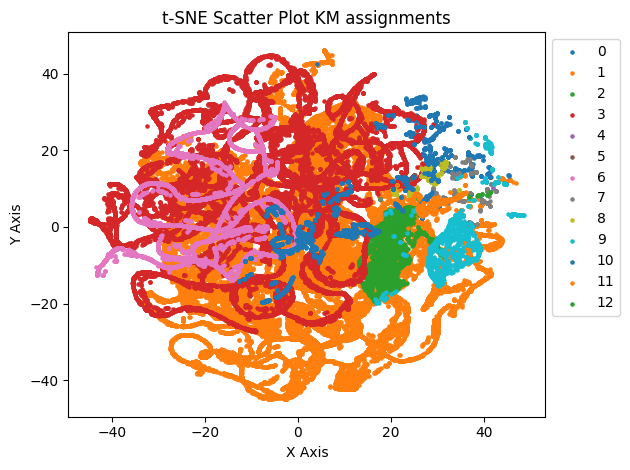

In [35]:
fig, ax = plt.subplots()

for i in np.unique(X_tsne.KM):
    subdf = X_tsne[X_tsne.KM == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('t-SNE Scatter Plot KM assignments')
plt.tight_layout()
plt.show()

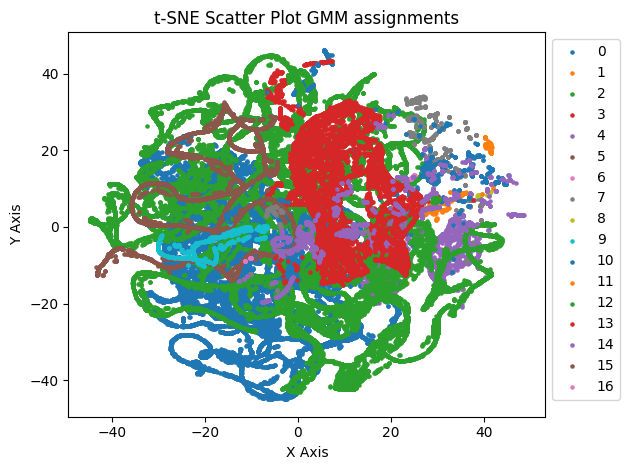

In [36]:
fig, ax = plt.subplots()

for i in np.unique(X_tsne.GMM):
    subdf = X_tsne[X_tsne.GMM == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('t-SNE Scatter Plot GMM assignments')
plt.tight_layout()
plt.show()

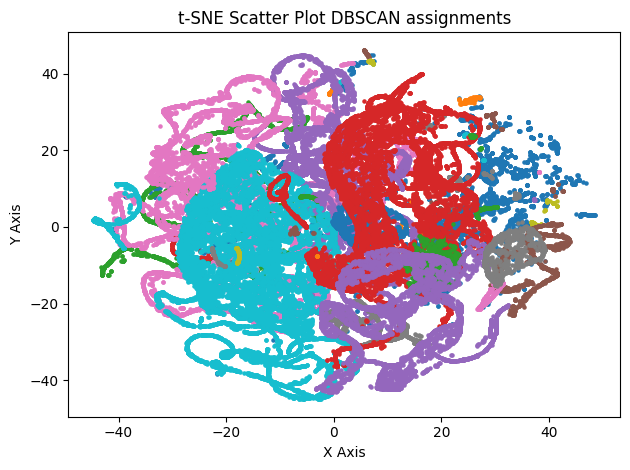

In [38]:
fig, ax = plt.subplots()

for i in np.unique(X_tsne.DBSCAN):
    subdf = X_tsne[X_tsne.DBSCAN == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('t-SNE Scatter Plot DBSCAN assignments')
plt.tight_layout()
plt.show()